In [164]:
from bs4 import BeautifulSoup as bs
import csv
import pandas
import matplotlib.pyplot as plt
import requests

%matplotlib inline

In [165]:
# Настройка отображения графика
plt.style.use('ggplot')

In [166]:
# Недочеты: города только транслитом
#           категории (идет после города) пока не выбрать (либо искать по всем, но возникают ошибки)

city = input("Input City Name: ")
query = input("Input Query: ").replace(" ", "+")
url = ("https://www.avito.ru/" + city + "/igry_pristavki_i_programmy?q=" + query)

print(url)

# заголовки колонок в .csv
with open(f'{query}.csv', 'w', newline='', encoding='utf-8') as csvfile:
        datawriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        datawriter.writerow(['name']+['price']+['url']+['address']+['date'])

Input City Name: dimitrovgrad
Input Query: star wars
https://www.avito.ru/dimitrovgrad/igry_pristavki_i_programmy?q=star+wars


In [167]:
r = requests.get(url)
soup = bs(r.text, 'html.parser')
trade_list = soup.find_all('div', {'class': 'description item_table-description'})

for i in trade_list:
    url_block = i.find('a', {'class': 'snippet-link'})
    price_block = i.find('span', {'class': 'snippet-price'})
    address_block = i.find('span', {'class': 'item-address__string'})
    date_block = i.find('div', {'class': 'snippet-date-info'})

    name = url_block.string.strip()
    href = "https://www.avito.ru" + url_block.get('href')
    price = price_block.string.strip().replace("₽", "").replace(" ", "").strip()
    
    if(price != 'Ценанеуказана'):
        int(price)
    else:
        price = 0
        int(price)
        
    address = address_block.string.strip()
    date = date_block.get('data-tooltip')
    
    # запись в .csv
    with open(f'{query}.csv', 'a', newline='', encoding='utf-8') as csvfile:
        datawriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        datawriter.writerow([name]+[price]+[href]+[address]+[date])

In [168]:
#Чтение данных из .cvs
data_frame = pandas.read_csv(f'{query}.csv', encoding='UTF-8', sep=',', engine='python')

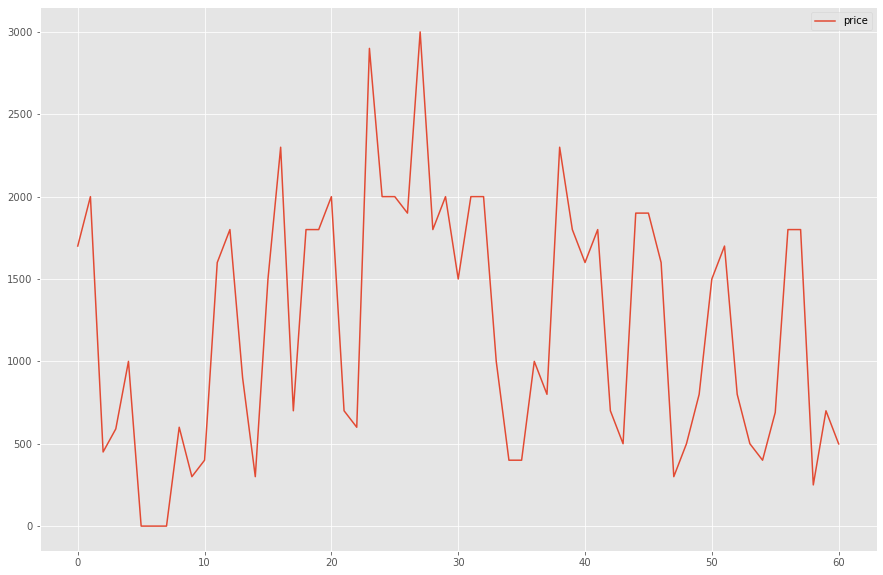

In [169]:
# строим график по датафрейму, который мы заполнили выше
# важно! график строится только по численным значениям
# для этого price приводили к int
# график строится по убыванию даты публикации (от нового к стары)
data_frame.plot(figsize=(15, 10))

In [170]:
# построение Data Frame
# можно вывести тконкретные колонки data_frame[['name', 'price', 'address']]

# максимальный вывод 100 строк (что бы не было сворачиваний вывода, а отобразил все)
pandas.options.display.max_rows = 100
# отображаем Data Frame
data_frame

,name,price,url,address,date
0,Star Wars Jedi: fallen order ps4,1700,https://www.avito.ru/dimitrovgrad/igry_pristav...,"пр-т Автостроителей, 74А",16 июня 01:14
1,Star Wars Jedi: Fallen Order,2000,https://www.avito.ru/dimitrovgrad/igry_pristav...,"пр-т Автостроителей, 51В",14 июня 16:25
2,Star wars kinect для xbox 360,450,https://www.avito.ru/dimitrovgrad/igry_pristav...,ул. Куйбышева,5 июня 00:02
3,Battlefront star wars для Sony PS 4 продажа/обмен,590,https://www.avito.ru/dimitrovgrad/igry_pristav...,"ул. Куйбышева, 213",3 июня 18:53
4,Ps4 игры лицензия,1000,https://www.avito.ru/dimitrovgrad/igry_pristav...,"ул. Королёва, 11",6 июня 12:08
5,Игры для Sony PS4,0,https://www.avito.ru/dimitrovgrad/igry_pristav...,"Ульяновская область, Димитровград",7 июня 14:20
6,Игры для детей рs З,0,https://www.avito.ru/dimitrovgrad/igry_pristav...,"Гвардейская ул., 23",3 июня 19:29
7,Ведьмак 3 для PS4 +(список игр внутри),0,https://www.avito.ru/dimitrovgrad/igry_pristav...,"Гвардейская ул., 30",3 июня 18:53
8,Игры лицензионные для Sony PS4,600,https://www.avito.ru/dimitrovgrad/igry_pristav...,Гвардейская ул.,2 июня 17:51
9,Лицензия xbox360 игры,300,https://www.avito.ru/dimitrovgrad/igry_pristav...,ул. Королёва,22 мая 12:19


In [171]:
# сортируем a->A по колонке price
data_frame.sort_values('price', ascending=True)

,name,price,url,address,date
5,Игры для Sony PS4,0,https://www.avito.ru/dimitrovgrad/igry_pristav...,"Ульяновская область, Димитровград",7 июня 14:20
6,Игры для детей рs З,0,https://www.avito.ru/dimitrovgrad/igry_pristav...,"Гвардейская ул., 23",3 июня 19:29
7,Ведьмак 3 для PS4 +(список игр внутри),0,https://www.avito.ru/dimitrovgrad/igry_pristav...,"Гвардейская ул., 30",3 июня 18:53
58,Star Wars Jedi Fallen Order,250,https://www.avito.ru/moskva/igry_pristavki_i_p...,Москва,13 июня 12:14
9,Лицензия xbox360 игры,300,https://www.avito.ru/dimitrovgrad/igry_pristav...,ул. Королёва,22 мая 12:19
47,Star wars battlefront ps 4,300,https://www.avito.ru/sankt-peterburg/igry_pris...,Санкт-Петербург,14 июня 14:50
14,Star wars Jedi Fallen Order Xbox one,300,https://www.avito.ru/moskva/igry_pristavki_i_p...,Москва,16 июня 14:23
34,Star wars battlefront 2 psp,400,https://www.avito.ru/chelyabinsk/igry_pristavk...,"Челябинская область, Челябинск",15 июня 16:12
35,Star Wars battlefront,400,https://www.avito.ru/rostov-na-donu/igry_prist...,"Ростовская область, Ростов-на-Дону",15 июня 09:15
10,Коллекция игр для Sony PS3 часть - № 2,400,https://www.avito.ru/dimitrovgrad/igry_pristav...,Гвардейская ул.,1 июня 23:26
